# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [1]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
import cv2  # For reading images
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("download (3).jpg")

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Getting RGB Image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Getting Grayscale Image

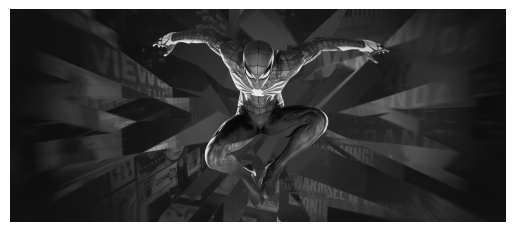

In [5]:
plt.imshow(img_gray, cmap='gray')
plt.axis("off")
plt.show()

In [6]:
# Custom function to get histogram data for Grayscale image using NumPy
def gray_histogram(gray_img):
  hist = np.zeros(256)
  for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
      hist[gray_img[i][j]] += 1
  return hist

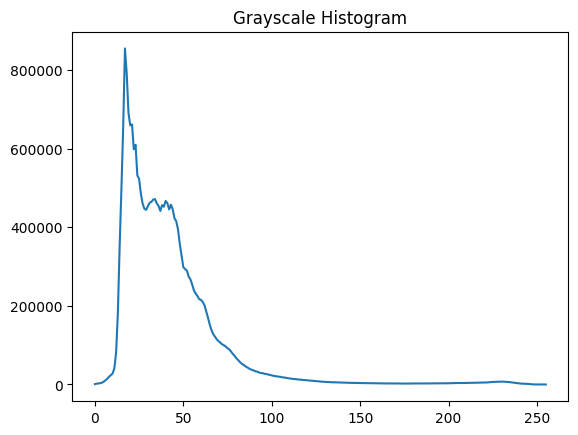

In [7]:
# Plotting the Grayscale histogram
plt.plot(gray_histogram(img_gray))
plt.title("Grayscale Histogram")
plt.show()

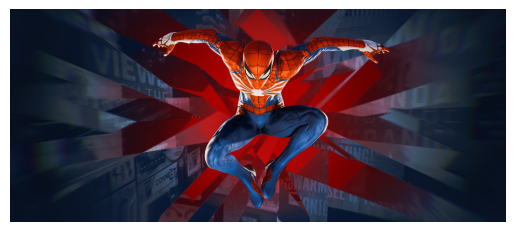

In [8]:
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [9]:
# Custom function to get histogram data for RGB image using NumPy
def rgb_histogram(img_rgb):
  hist1 = np.zeros(256)
  hist2 = np.zeros(256)
  hist3 = np.zeros(256)
  r , g , b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
  for i in range(img_rgb.shape[0]):
    for j in range(img_rgb.shape[1]):
      hist1[r[i][j]] += 1
      hist2[g[i][j]] += 1
      hist3[b[i][j]] += 1
  return hist1, hist2, hist3

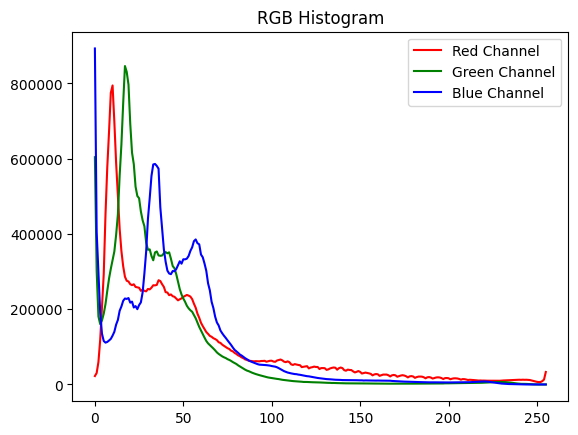

In [10]:
# Plotting the RGB histogram
plt.plot(rgb_histogram(img_rgb)[0], 'r', label="Red Channel")
plt.plot(rgb_histogram(img_rgb)[1], 'g', label="Green Channel")
plt.plot(rgb_histogram(img_rgb)[2], 'b', label="Blue Channel")
plt.title("RGB Histogram")
plt.legend()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [11]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [12]:
# As stated, I searched for the reason behind using the formulas and got to know the following:

#   - RGB is a cube and HSV is a hexacone
#   In this hexacone, top vertex is balck
#   And six vertices of base hexagon are red, yellow, green, cyan, blue, magneta and back to red

#   - V = max(R,G,B) because brightness is determined by the strongest color component
#   - S = (max - min) / max because saturation measures how far a color is from gray,
#       and the (max - min) range captures color intensity while dividing by max normalizes it
#   - Hue uses different formulas depending on which channel is the maximum,
#       because the hue angle lies on a hexagon and each primary color (R, G, B)
#       defines a different sector of that hexagon
#   - The piecewise hue formula ensures the correct angular position of the color
#       in the circular HSV hue space

#  Overall, these formulas mathematically map a point from the RGB cube to its
#  perceptually meaningful position in the HSV hexacone

In [13]:
def rgb_to_hsv(img): # Takes a 0-255 (not normalised) RGB image
  # Normalizing the RGB value and change of dtype to ensure the same
  r,g,b = img[:,:,0].astype("float")/255, img[:,:,1].astype("float")/255, img[:,:,2].astype("float")/255

  # Calculating per pixel cmax and cmin
  cmax = np.maximum(np.maximum(r, g), b)
  cmin = np.minimum(np.minimum(r, g), b)
  delta = cmax - cmin

  h = np.zeros_like(cmax)
  s = np.zeros_like(cmax)
  v = cmax  # Value

  # Saturation
  for i in range(cmax.shape[0]):
    for j in range(cmax.shape[1]):
      if cmax[i][j] != 0:
        s[i][j] = delta[i][j] / cmax[i][j]
  # Hue
  for i in range(cmax.shape[0]):
    for j in range(cmax.shape[1]):
      if delta[i][j] != 0:
        if cmax[i][j] == r[i][j]:
          h[i][j] = ((g[i][j] - b[i][j]) / delta[i][j])
        elif cmax[i][j] == g[i][j]:
          h[i][j] = ((b[i][j] - r[i][j]) / delta[i][j]) + 2
        elif cmax[i][j] == b[i][j]:
          h[i][j] = ((r[i][j] - g[i][j]) / delta[i][j]) + 4
        h[i][j] = h[i][j] % 6.0
        h[i][j] = h[i][j] * 60  # Theoretical 0-360 range

  # Scale S,V
  s = (s * 255).astype(np.uint8)
  v = (v * 255).astype(np.uint8)
  # Returns an HSV image (also not normalised, compatible with OpenCV cvtColor)
  hsv = np.zeros_like(img, dtype=np.float32)
  hsv[:,:,0] = h/2  # Since HSV range for OpenCV is 0-179 and not the theoretical 0-360
  hsv[:,:,1] = s
  hsv[:,:,2] = v
  hsv = hsv.astype(np.uint8)
  return hsv

In [14]:
hsv = rgb_to_hsv(img_rgb)

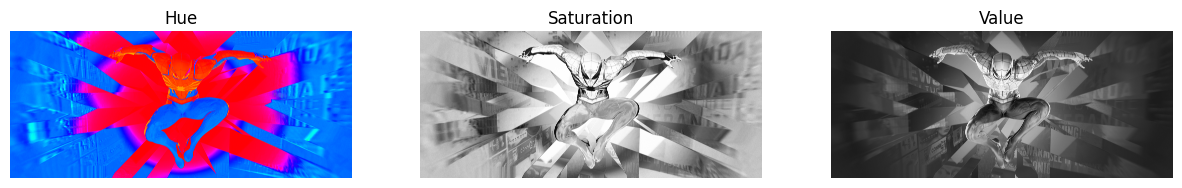

In [15]:
plt.figure(figsize=(15,7))

# Hue
plt.subplot(1,3,1)
plt.imshow(hsv[:,:,0], cmap='hsv')   # Hue is an angle (0–179)
plt.title("Hue")
plt.axis("off")

# Saturation
plt.subplot(1,3,2)
plt.imshow(hsv[:,:,1], cmap='gray')  # Saturation is intensity 0–255
plt.title("Saturation")
plt.axis("off")

# Value
plt.subplot(1,3,3)
plt.imshow(hsv[:,:,2], cmap='gray')  # Value is intensity 0–255
plt.title("Value")
plt.axis("off")

plt.show()

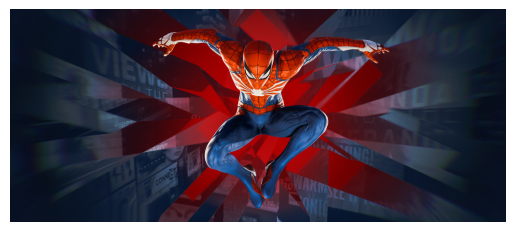

In [16]:
rgb_from_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_from_hsv)
plt.axis("off")
plt.show()

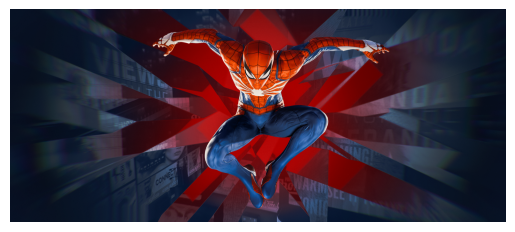

In [17]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
img_rgb_from_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb_from_hsv)
plt.axis("off")
plt.show()

In [18]:
# As we can see that using cv2 function gives the same result as our function, it means our function is correct.

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [19]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [20]:
# Function to display 3 images (Original, Post-Modification-1 and Output i.e. Post-Modification-2 image) side by side
def show_3_images(img1, img2, img3, title1 = "Original", title2 = "Processed", title3 = "Output"):
  plt.figure(figsize=(14,8))

  plt.subplot(1,3,1);
  plt.imshow(img1);
  plt.title(title1);
  plt.axis("off")

  plt.subplot(1,3,2);
  plt.imshow(img2);
  plt.title(title2);
  plt.axis("off")

  plt.subplot(1,3,3);
  plt.imshow(img3);
  plt.title(title3);
  plt.axis("off")

  plt.show()

In [21]:
# For both filters:
#   To get better understanding, I tried to implement most of the processing using NumPy and used OpenCV only when necessary

In [22]:
# Filter 1
class DeNiggaFier():  # No racist thoughts by the way
  def __init__(self, img_rgb):  # Takes 0-255 RGB Image
    self.img_rgb = img_rgb
    self.r = img_rgb[:,:,0]
    self.g = img_rgb[:,:,1]
    self.b = img_rgb[:,:,2]

  # Contrast Adjustment
  # Histogram Equalization for a single channel
  def hist_equalization(self, channel):
    hist = gray_histogram(channel)  # already defined function in part A for a single channel
    cdf = np.cumsum(hist) # Cumulative Distribution Function of the histogram

    # Normalize the CDF to range [0, 255]
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype(np.uint8)

    # Map the original channel pixels to the normalized CDF values
    # This produces the histogram-equalized channel
    equalized_channel = cdf_normalized[channel]
    return equalized_channel

  # Equalize all 3 channels
  def equalized(self):
    r_ = self.hist_equalization(self.r)
    g_ = self.hist_equalization(self.g)
    b_ = self.hist_equalization(self.b)
    return np.stack([r_, g_, b_], axis=2)

  # Channel Mixing
  # Blend original and equalized images based on intensity threshold
  def threshold_blend(self, equalized, threshold=0.5, smooth=0.1, bright_blend_factor=0.5):
    img = self.img_rgb.astype(np.float32) / 255.0
    eq   = equalized.astype(np.float32) / 255.0

    # Calculate intensity according to human perception
    I = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

    mask = np.zeros_like(I, dtype=np.float32)

    # Full equalized in dark regions
    mask[I < threshold] = 1.0

    # Smooth blend in mid intensity range
    lower = threshold
    upper = threshold + smooth
    mid = (I >= lower) & (I <= upper)
    t = (I[mid] - lower) / smooth
    mask[mid] = 1.0 - t * (1.0 - bright_blend_factor)

    # Blend bright regions partially with original
    mask[I > upper] = bright_blend_factor

    mask = np.dstack([mask]*3)
    result = eq * mask + img * (1 - mask)

    return (result * 255).astype(np.uint8) # Returns 0-255 RGB Image

In [23]:
# We chose the following modifications for above filter:
# 1) Histogram Equalization (per-channel): Enhances contrast in dark and mid-tone areas
#    making details more visible without affecting bright highlights too much.
# 2) Threshold-based blending between original and equalized images:
#    - Fully applies equalization in darker regions to recover shadow details.
#    - Gradually blends equalized and original in midtones to prevent over-contrasting.
#    - Retains some of the original information in bright regions to avoid unnatural highlights.

# Instead of using Gamma Correction, we used Histogram Equalization because:
# Gamma Correction globally brightens or darkens the image nonlinearly
# which can either wash out bright regions or leave shadows underexposed.
# Since our target images are of low-brightness/shadow-heavy (e.g. night scenes, underexposed street photos),
# gamma alone would either blow out highlights or fail to recover shadow details effectively.

# Why these modifications suit the image:
# - Histogram equalization locally stretches contrast in darker areas, making textures and details visible.
# - Threshold-based blending avoids harsh contrast in bright areas and preserves a natural look.

# Types of images this filter is good for:
# - Low-light images
# - Night street photography
# - Indoor shots with uneven lighting
# - Any image where shadow recovery is important without overexposing highlights

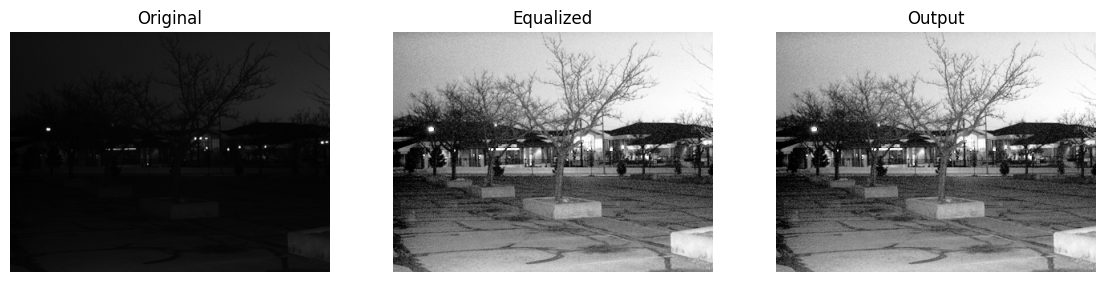

In [24]:
# Example 1 for Filter 1
img_c1 = cv2.imread("/content/40484university.webp")  # Night street photography
img_rgb1 = cv2.cvtColor(img_c1, cv2.COLOR_BGR2RGB)

# Using Filter
filter1 = DeNiggaFier(img_rgb1)
eq_img1 = filter1.equalized()
output1 = filter1.threshold_blend(eq_img1)

# Display
show_3_images(img_rgb1, eq_img1, output1, title2 = "Equalized")

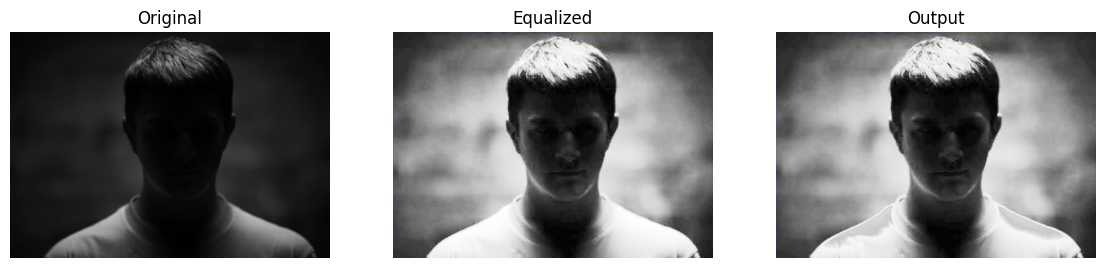

In [25]:
# Example 2 for Filter 1
img_c2 = cv2.imread("/content/Screenshot 2025-12-10 at 8.09.11 PM.png") # Low-light images
img_rgb2 = cv2.cvtColor(img_c2, cv2.COLOR_BGR2RGB)

# Using Filter
filter1 = DeNiggaFier(img_rgb2)
eq_img2 = filter1.equalized()
output2 = filter1.threshold_blend(eq_img2)
# We could have also used Histogram Equalizaion on local face region to get better output

# Display
show_3_images(img_rgb2, eq_img2, output2, title2 = "Equalized")

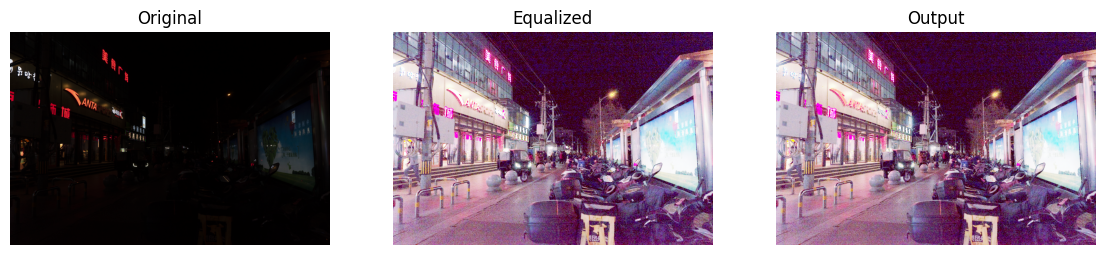

In [26]:
# Example 3 for Filter 1
img_c3 = cv2.imread("/content/download (10).png") # Night street photography
img_rgb3 = cv2.cvtColor(img_c3, cv2.COLOR_BGR2RGB)

# Using Filter
filter1 = DeNiggaFier(img_rgb3)
eq_img3 = filter1.equalized()
output3 = filter1.threshold_blend(eq_img3)  # Output has the name of shops which was lit as more clear

# Display
show_3_images(img_rgb3, eq_img3, output3, title2 = "Equalized")

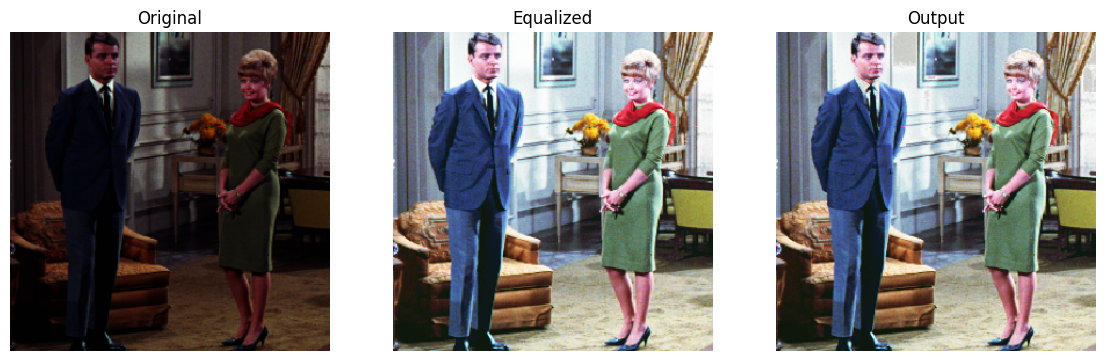

In [27]:
# Example 4 for Filter 1
img_c4 = cv2.imread("/content/download (6).png")  # Indoor shots with uneven lighting
img_rgb4 = cv2.cvtColor(img_c4, cv2.COLOR_BGR2RGB)

# Using Filter
filter1 = DeNiggaFier(img_rgb4)
eq_img4 = filter1.equalized()
output4 = filter1.threshold_blend(eq_img4)

# Display
show_3_images(img_rgb4, eq_img4, output4, title2 = "Equalized")

**Next, we have filter 2 :**

In [28]:
# Filter 2
class SadakChilli(): # Sadak (best for street-photography) + Chill (adds bluish tint) + i (idk why Sheikh Chilli came in my mind)
  def __init__(self, img_rgb):  # Takes 0-255 RGB Image
    self.img_rgb = img_rgb.astype(np.uint8)

  # Saturation Change
  def boost_saturation(self, factor = 1.2):
    img = self.img_rgb
    hsv = rgb_to_hsv(img)  # Already defined in Task B
    h, s, v = cv2.split(hsv)  # Seperating channels from HSV Image

    # Boost saturation
    s = s.astype(np.float32) * factor
    s = np.clip(s, 0, 255).astype(np.uint8) # Clipping

    hsv2 = cv2.merge([h, s, v]) # Merging channels
    return cv2.cvtColor(hsv2, cv2.COLOR_HSV2RGB)

  # Custom Color (Bluish) Tint
  def cool_white_balance(self, strength = 0.4):
    img = self.boost_saturation(1.2)
    img = img.astype(np.float32)

    # Decrease R, slightly decrease G, increase B (experimental)
    img[:,:,0] = img[:,:,0] * (1 - strength * 0.5)  # R reduced
    img[:,:,1] = img[:,:,1] * (1 - strength * 0.2)  # G slightly reduced
    img[:,:,2] = img[:,:,2] * (1 + strength * 0.5)  # B increased

    # Clipping and converting back to uint8
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img  # Returns 0-255 RGB Image

In [29]:
# For second filter, we chose the following modifications:
# 1) Saturation Boost:
#    - Converts the image to HSV color space and increases the saturation channel.
#    - Enhances dull colors in a natural way without affecting brightness or hue.
# 2) Cool White Balance:
#    - Applies a subtle cool tint by reducing red, slightly reducing green (this was experimental) and increasing blue.
#    - Works on top of saturation boost to give the image a visually appealing blue tone.
#    - Strength parameter allows control the intensity of the blue/cool tone.

# Why these modifications suit the image:
# - Saturation boost recovers vibrancy for images with muted colors.
# - Cool white balance adds depth and mood especially for urban scenes.
# - Combined, they enhance street photos.

# Types of images this filter is good for:
# - Street photography  (best-suited)
# - Urban landscapes with muted colors
# - Any image where vibrant but natural colors with a cool tint are desired

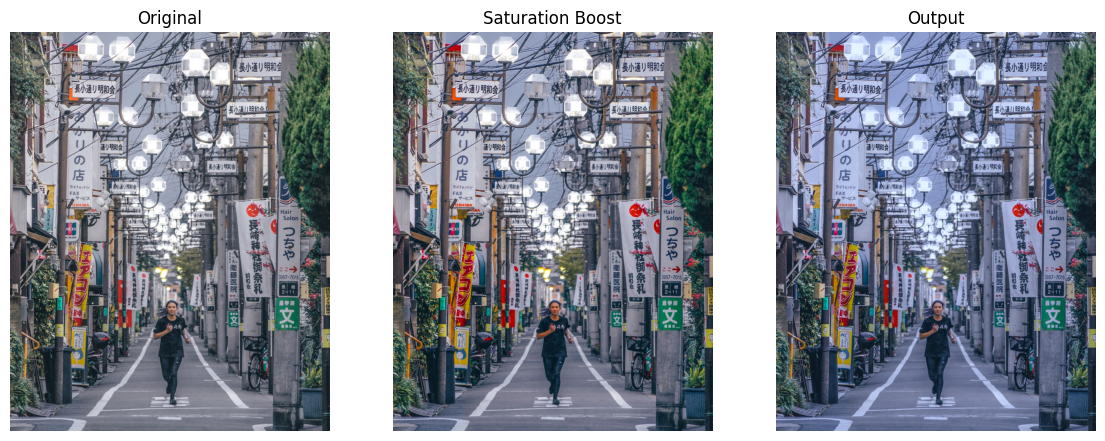

In [30]:
# Example 1 for Filter 2
img1_c2 = cv2.imread("/content/street (1).jpg")  # Street photography
img1_rgb = cv2.cvtColor(img1_c2, cv2.COLOR_BGR2RGB)

# Applying Filter
filter = SadakChilli(img1_rgb)
saturation_boost1 = filter.boost_saturation(1.5)
output1 = filter.cool_white_balance(0.2)

# Display
show_3_images(img1_rgb, saturation_boost1, output1, title2 = "Saturation Boost")

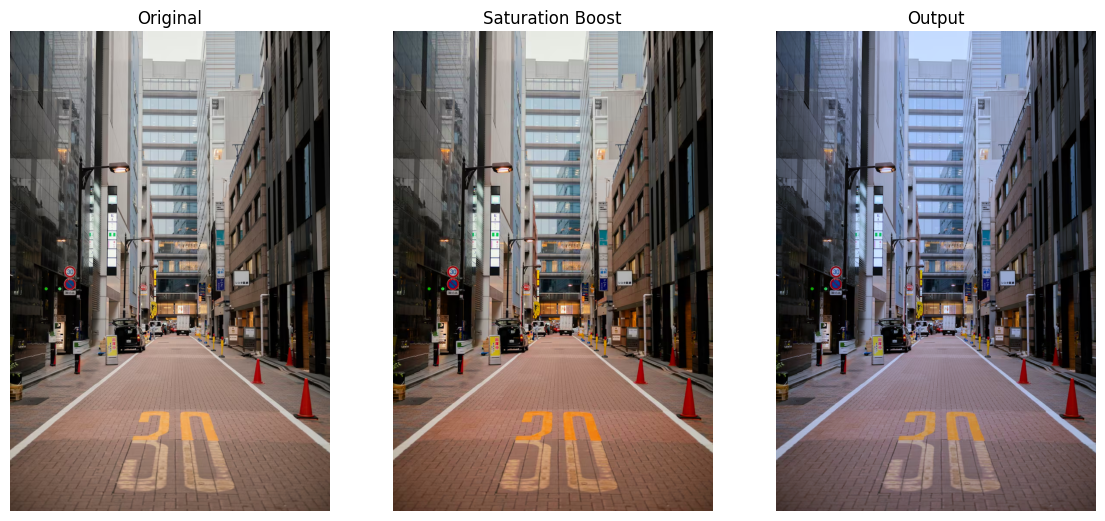

In [31]:
# Example 2 for Filter 2
img2_c2 = cv2.imread("/content/street.avif")  # Street photography
img2_rgb = cv2.cvtColor(img2_c2, cv2.COLOR_BGR2RGB)

# Applying Filter
filter = SadakChilli(img2_rgb)
saturation_boost2 = filter.boost_saturation(1.4)
output2 = filter.cool_white_balance(0.3)

# Display
show_3_images(img2_rgb, saturation_boost2, output2, title2 = "Saturation Boost")

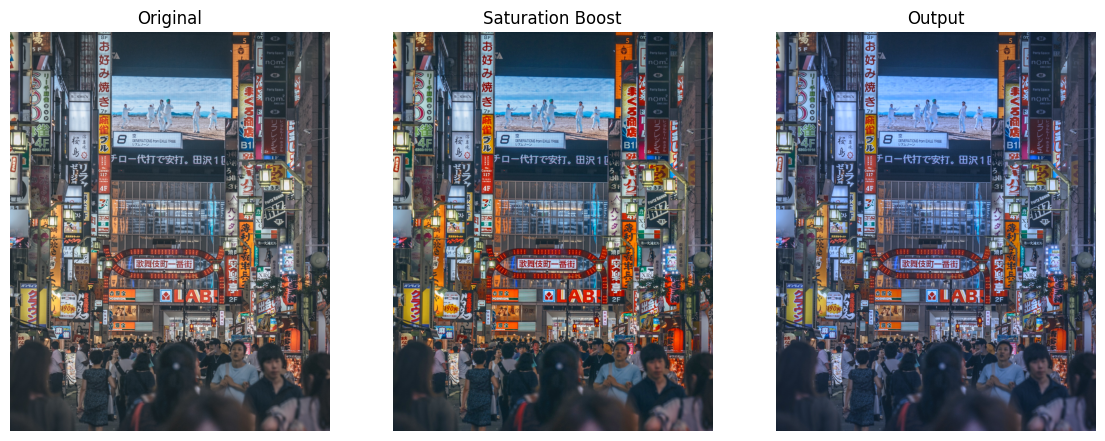

In [32]:
# Example 3 for Filter 2
img3_c2 = cv2.imread("/content/download (9).jpg")  # Urban image with muted colors
img3_rgb = cv2.cvtColor(img3_c2, cv2.COLOR_BGR2RGB)

# Applying Filter
filter = SadakChilli(img3_rgb)
saturation_boost3 = filter.boost_saturation(1.5)
output3 = filter.cool_white_balance(0.3)

# Display
show_3_images(img3_rgb, saturation_boost3, output3, title2 = "Saturation Boost")

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [33]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [34]:
img_d = cv2.imread("download (5).png")
img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2RGB)

In [35]:
def white_patch_balance(img_rgb):
  # Seperating channels in RGB image
  r = img_rgb[:,:,0].astype(np.float32)
  g = img_rgb[:,:,1].astype(np.float32)
  b = img_rgb[:,:,2].astype(np.float32)

  # Getting a single intensity array described by weighted formula good for human perception
  intensity = 0.299*r + 0.587*g + 0.114*b
  # Getting index of maximum intensity i.e. most white pixel in image
  y, x = np.unravel_index(np.argmax(intensity), intensity.shape)

  # Storing brightest pixel
  r_max = img_rgb[y, x, 0]
  g_max = img_rgb[y, x, 1]
  b_max = img_rgb[y, x, 2]

  # Finding Scaling Factor
  scale_r = 255.0 / r_max
  scale_g = 255.0 / g_max
  scale_b = 255.0 / b_max

  # Scaling
  r_ = r * scale_r
  g_ = g * scale_g
  b_ = b * scale_b

  # Clipping and DataType conversion
  r_ = np.clip(r_, 0, 255).astype(np.uint8)
  g_ = np.clip(g_, 0, 255).astype(np.uint8)
  b_ = np.clip(b_, 0, 255).astype(np.uint8)

  # Creating final white-patch balanced image
  img_wb = np.zeros_like(img_rgb, dtype=np.uint8)
  img_wb[:,:,0] = r_
  img_wb[:,:,1] = g_
  img_wb[:,:,2] = b_

  return img_wb

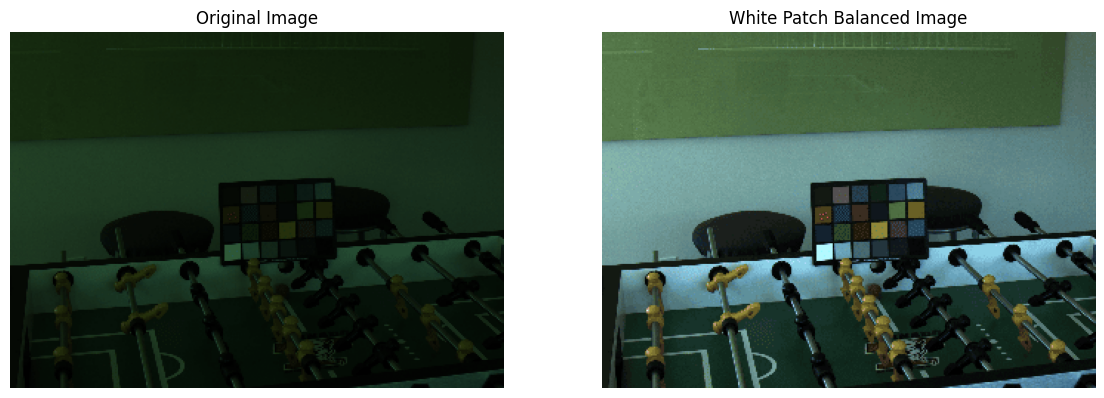

In [36]:
# Displaying the Original and Output Image
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.imshow(img_d)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(white_patch_balance(img_d))
plt.title("White Patch Balanced Image")
plt.axis("off")

plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [37]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [38]:
img_e = cv2.imread("download (3).jpeg")
img_rgb = cv2.cvtColor(img_e, cv2.COLOR_BGR2RGB)

In [39]:
def white_balance(img_rgb, value):  # Takes 0-255 RGB Image and 0-1 decimal number
  # Convert value to a range [-1, 1]
  f = (value - 0.5) * 2  # value=0 => f=-1 (coldest), value=0.5 => f=0, value=1 => f=1 (warmest)

  # Adjusting channels considering:
  #   -> for warm we need more of yellowish tint
  #   -> for cold we need more of bluish tint
  r = img_rgb[:, :, 0] + f * (255 - img_rgb[:, :, 0])  # increase red for warm, decrease for cold
  g = img_rgb[:, :, 1] + f * (255 - img_rgb[:, :, 1])  # same as red (bcs. yellow = red + green)
  b = img_rgb[:, :, 2] - f * (255 - img_rgb[:, :, 2])  # increase blue for cold, decrease for warm

  # Clip to valid range
  r = np.clip(r, 0, 255)
  g = np.clip(g, 0, 255)
  b = np.clip(b, 0, 255)

  # Combine channels
  img_wb = np.stack([r, g, b], axis=2).astype(np.uint8)

  return img_wb # Output is 0-255 RGB Image

In [40]:
# Display Images
def show(value):
  plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.title("Original Image")
  plt.imshow(img_rgb)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.title(f"White-Balanced (value={value:.2f})")
  plt.imshow(white_balance(img_rgb, value))
  plt.axis('off')

  plt.show()

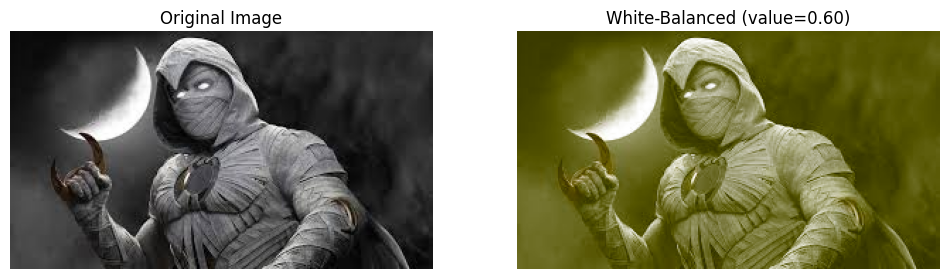

In [50]:
show(0.6)

In [ ]:
from ipywidgets import interact

# Slider from 0 (cold) to 1 (warm)
interact(show, value=(0.0, 1.0, 0.001))

Please download the notebook, upload in Collab and uncomment above code block to see the result using interactable slider because other doesn't support the widget used for it.

Below is image of output what was done using slider:
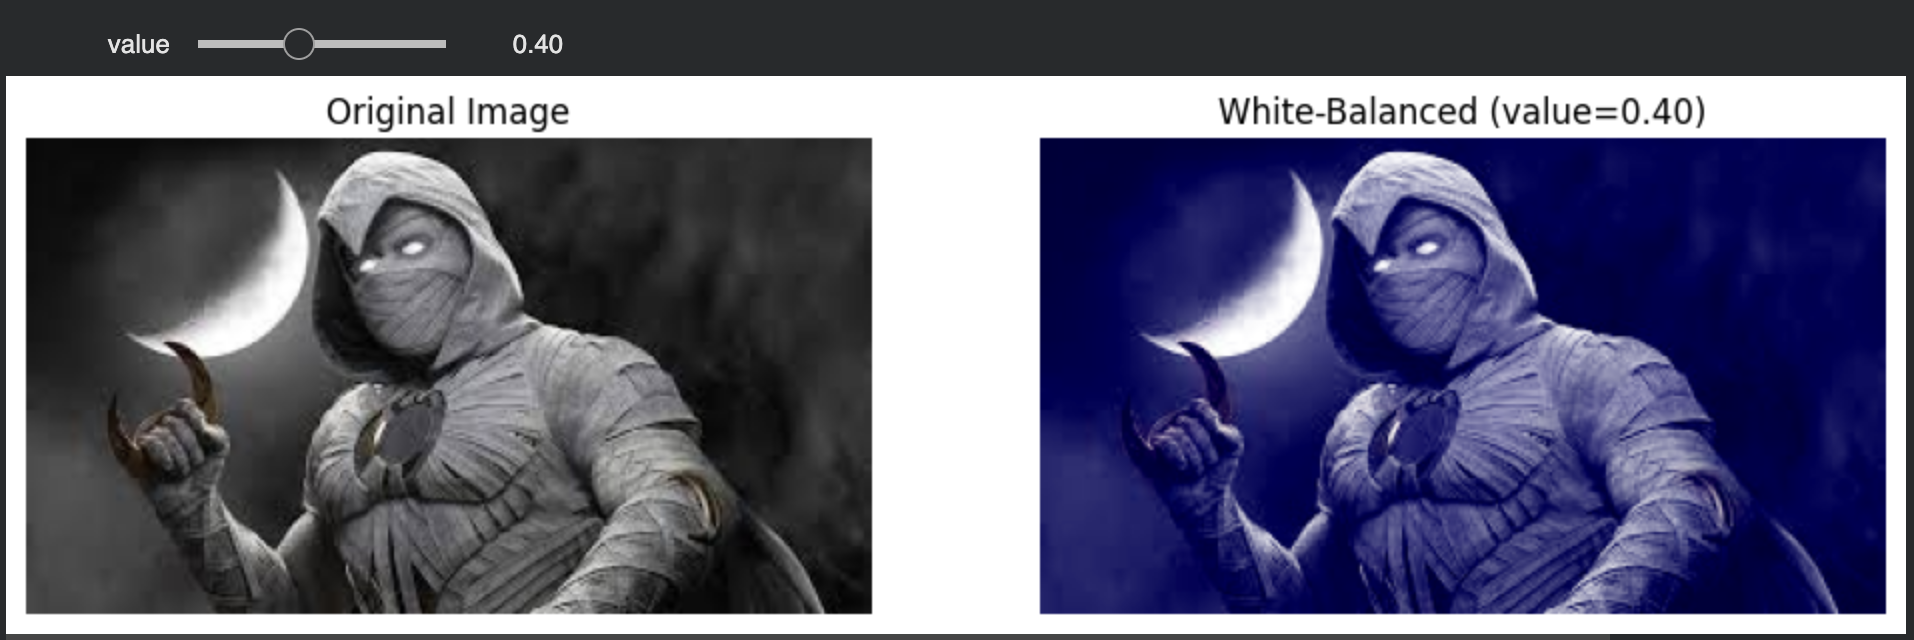

In [42]:
# The above approach gives the warmest and coldest version on varying value as asked in the task.
# The warmest version has red and green channels having all 255's and blue one to have all 0's
# And similarly coldest version has blue channel having all 255's and red and green having all 0's.

# But this doesn't look realistic like the one that works in phone...

# So, below is another set of functions to give a more realistic yet simpler version of white balance scale like that in phone.

In [43]:
def white_balance_realistic(img_rgb, value):
  f = (value - 0.5) * 2

  # Only change is what f is being multiplied to alter the pixel values
  # The value 30 was bit experimental. I started from 100 and scaled down to 20 and found 30-35 as the best ones.
  r = img_rgb[:, :, 0] + f * 30
  g = img_rgb[:, :, 1] + f * 30
  b = img_rgb[:, :, 2] - f * 30

  r = np.clip(r, 0, 255)
  g = np.clip(g, 0, 255)
  b = np.clip(b, 0, 255)

  img_wb = np.stack([r, g, b], axis=2).astype(np.uint8)

  return img_wb

In [44]:
def show_realistic(value):
  plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.title("Original Image")
  plt.imshow(img_rgb)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.title(f"White-Balanced Realistic (value={value:.2f})")
  plt.imshow(white_balance_realistic(img_rgb, value))
  plt.axis('off')

  plt.show()

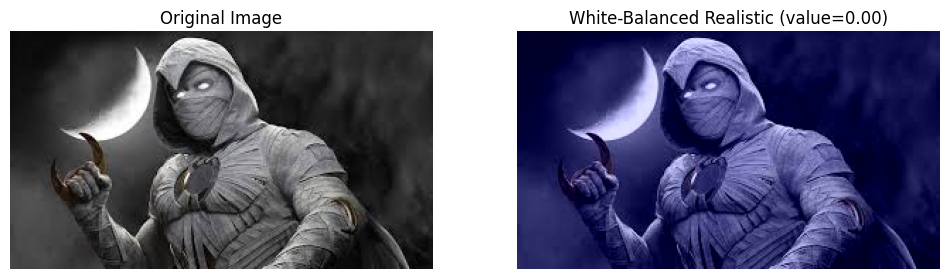

In [51]:
show_realistic(0.0)

In [ ]:
interact(show_realistic, value=(0.0, 1.0, 0.001))